In [4]:
import sys
sys.path.append("../../../")

 ## 数据

In [5]:
import matplotlib.pyplot as plt
import numpy as np
from pylib.utils.functions_for_classification import lin_separable_1d_2cls
from matplotlib.colors import ListedColormap

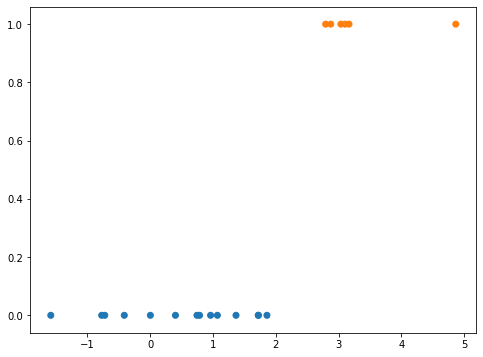

In [6]:
x, y = lin_separable_1d_2cls(20)

plt.figure(figsize=(8, 6))
colors = ['C0', 'C1']
plt.scatter(x, y, c=y, cmap=ListedColormap(colors))
plt.show()

## 逻辑斯蒂回归

In [7]:
import ipyvolume.pylab as plt3d
import numpy as np

### S型函数

In [8]:
def sigmoid_function(X, W):
    return 1 / (1 + np.exp(-X @ W))

### 二进制交叉熵成本函数

In [9]:
def binary_cross_entropy(X, W, y):
    y_pred0 = sigmoid_function(X[y.ravel() == 0], W)
    y_pred1 = sigmoid_function(X[y.ravel() == 1], W)
    epsilon = 1e-8
    loss = 1/len(y) * (-np.sum(np.log(1 - y_pred0 + epsilon)) - \
                       np.sum(np.log(y_pred1 + epsilon)))
    return loss

### 梯度函数

In [10]:
def gradient_function(X, W, y):
    p = sigmoid_function(X, W)
    return X.T @ (y - p)

### Hessian函数

In [11]:
def hessian_function(X, D, y):
    return -X.T @ D @ X

### 牛顿方法

In [12]:
def newtons_method(X, y, epochs=100):
    y = y.reshape(-1, 1)
    p = X.shape[1]
    W = np.random.randn(p, 1)
    weight_history = [W.copy()]
    loss = binary_cross_entropy(X, W, y)
    loss_history = [loss] 
    tol = 1e-8
    for e in range(epochs+1):
        if e <= 1 or e % 10 == 0:
            print("epoch={}, loss={}".format(e, loss))
        y_proba = sigmoid_function(X, W).ravel()
        D = np.diag(y_proba * (1 - y_proba))
        H = hessian_function(X, D, y)
        G = gradient_function(X, W, y)
        W += np.linalg.inv(-H) @ G 
        weight_history.append(W.copy())
        weights_diff = np.sum(np.abs(weight_history[-1] - weight_history[-2]))
        if weights_diff < tol or loss < tol:
            break
        loss = binary_cross_entropy(X, W, y)
        loss_history.append(loss)
        
    return weight_history ,loss_history

In [13]:
X = np.c_[np.ones(len(x)), x]
weight_history ,loss_history = newtons_method(X, y)

epoch=0, loss=1.0650992227882832
epoch=1, loss=0.2787877765445639
epoch=10, loss=7.456987528775398e-05


In [14]:
W = weight_history[-1]
W

array([[-85.36498545],
       [ 36.72145294]])

### 成本函数历史

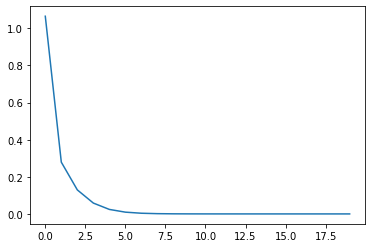

In [15]:
plt.plot(range(len(loss_history)), loss_history)
plt.show()

### 参数空间与优化路径

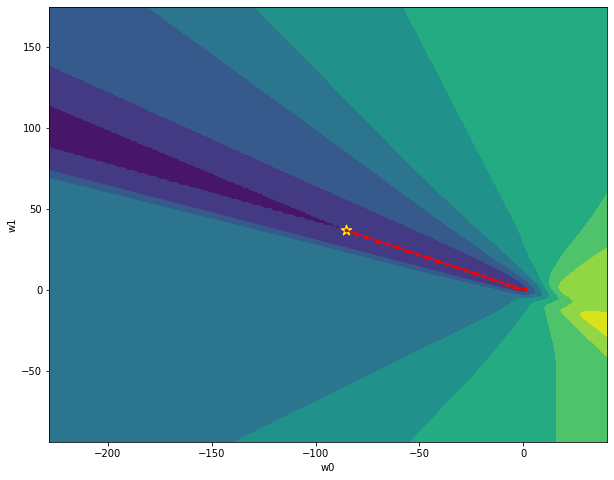

In [16]:
max_interval = np.abs(np.max(weight_history) - np.min(weight_history))
w0n_min = W[0] - max_interval
w0n_max = W[0] + max_interval
w1n_min = W[1] - max_interval
w1n_max = W[1] + max_interval
w0n = 1.1 * np.linspace(w0n_min, w0n_max, 150)
w1n = 1.1 * np.linspace(w1n_min, w1n_max, 150)
ww0n, ww1n = np.meshgrid(w0n, w1n)
Wn = np.c_[ww0n.ravel(), ww1n.ravel()]
lossn = np.array([binary_cross_entropy(X, w, y) for w in Wn]).reshape(ww0n.shape)
w0_path = np.array([w[0] for w in weight_history])
w1_path = np.array([w[1] for w in weight_history])

plt.figure(figsize=(10, 8))
plt.contourf(ww0n, ww1n, lossn)
plt.plot(w0_path, w1_path, ".-", c='r')
plt.scatter(W[0], W[1], c='yellow', marker='*', s=120)
plt.xlabel("w0")
plt.ylabel("w1")
plt.show()

In [17]:
loss_path = np.array([binary_cross_entropy(X, w, y) for w in weight_history])

plt3d.figure(width=1000, height=500)
plt3d.plot_surface(ww0n, lossn, ww1n, color="green")
plt3d.scatter(w0_path.ravel(), loss_path, w1_path.ravel(), 
              marker='sphere', size=3)
plt3d.plot(w0_path.ravel(), loss_path, w1_path.ravel())
plt3d.scatter(np.array([W[0]]), np.array([loss_history[-1]]), np.array([W[1]]),
              color='yellow', size=3)
plt3d.xlabel("w0")
plt3d.zlabel("w1")
plt3d.ylabel("loss")
plt3d.show()

### 决策点

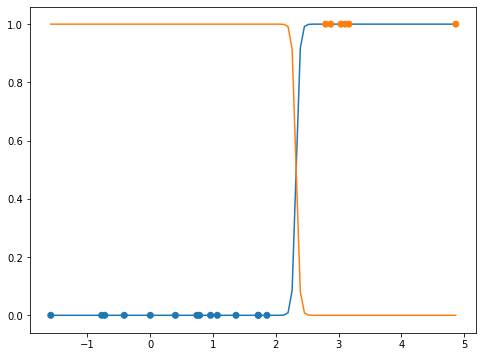

In [18]:
xn = np.linspace(x.min(), x.max(), 100)
Xn = np.c_[np.ones(len(xn)), xn]
yn_pred = sigmoid_function(Xn, W)

plt.figure(figsize=(8, 6))
plt.scatter(x, y, c=y, cmap=ListedColormap(colors), zorder=3)
plt.plot(xn, yn_pred)
plt.plot(xn, 1 - yn_pred)
plt.show()